In [372]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [373]:
df_customers = pd.read_csv('customers.csv')
df_loans = pd.read_csv('loans.csv')
df_bureau = pd.read_csv('bureau_data.csv')

In [374]:
df_bureau.shape, df_customers.shape, df_loans.shape

((50000, 8), (50000, 12), (50000, 15))

In [375]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [376]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [377]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [378]:
df = pd.merge(df_customers, df_loans, on = 'cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [379]:
df = pd.merge(df, df_bureau, on = 'cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


df.info()

In [380]:
df['default'] = df['default'].astype(int)
df.default.value_counts()
#there is a class imbalance (less than 10% are in  inority class)

default
0    45703
1     4297
Name: count, dtype: int64

In [381]:
df.head(1)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7


## Train Test Split 

In [382]:
X = df.drop('default', axis = 1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [383]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [384]:
X_test['loan_purpose'].unique()

array(['Education', 'Home', 'Auto', 'Personal', 'Personaal'], dtype=object)

## Data Cleaning

In [385]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [386]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [387]:
mode_value = df_train.residence_type.mode()[0]
mode_value

'Owned'

In [388]:
df_train['residence_type'].fillna(mode_value, inplace = True)

/var/folders/p8/mlwqld3d7l55q9vgw0x3pylm0000gn/T/ipykernel_73481/2072560644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna(mode_value, inplace = True)


In [389]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [390]:
df_test['residence_type'].fillna(mode_value, inplace = True)

/var/folders/p8/mlwqld3d7l55q9vgw0x3pylm0000gn/T/ipykernel_73481/3277269518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['residence_type'].fillna(mode_value, inplace = True)


In [391]:
df_test.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [392]:
df_train.duplicated().sum()

0

In [393]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [394]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

## Data Visualization

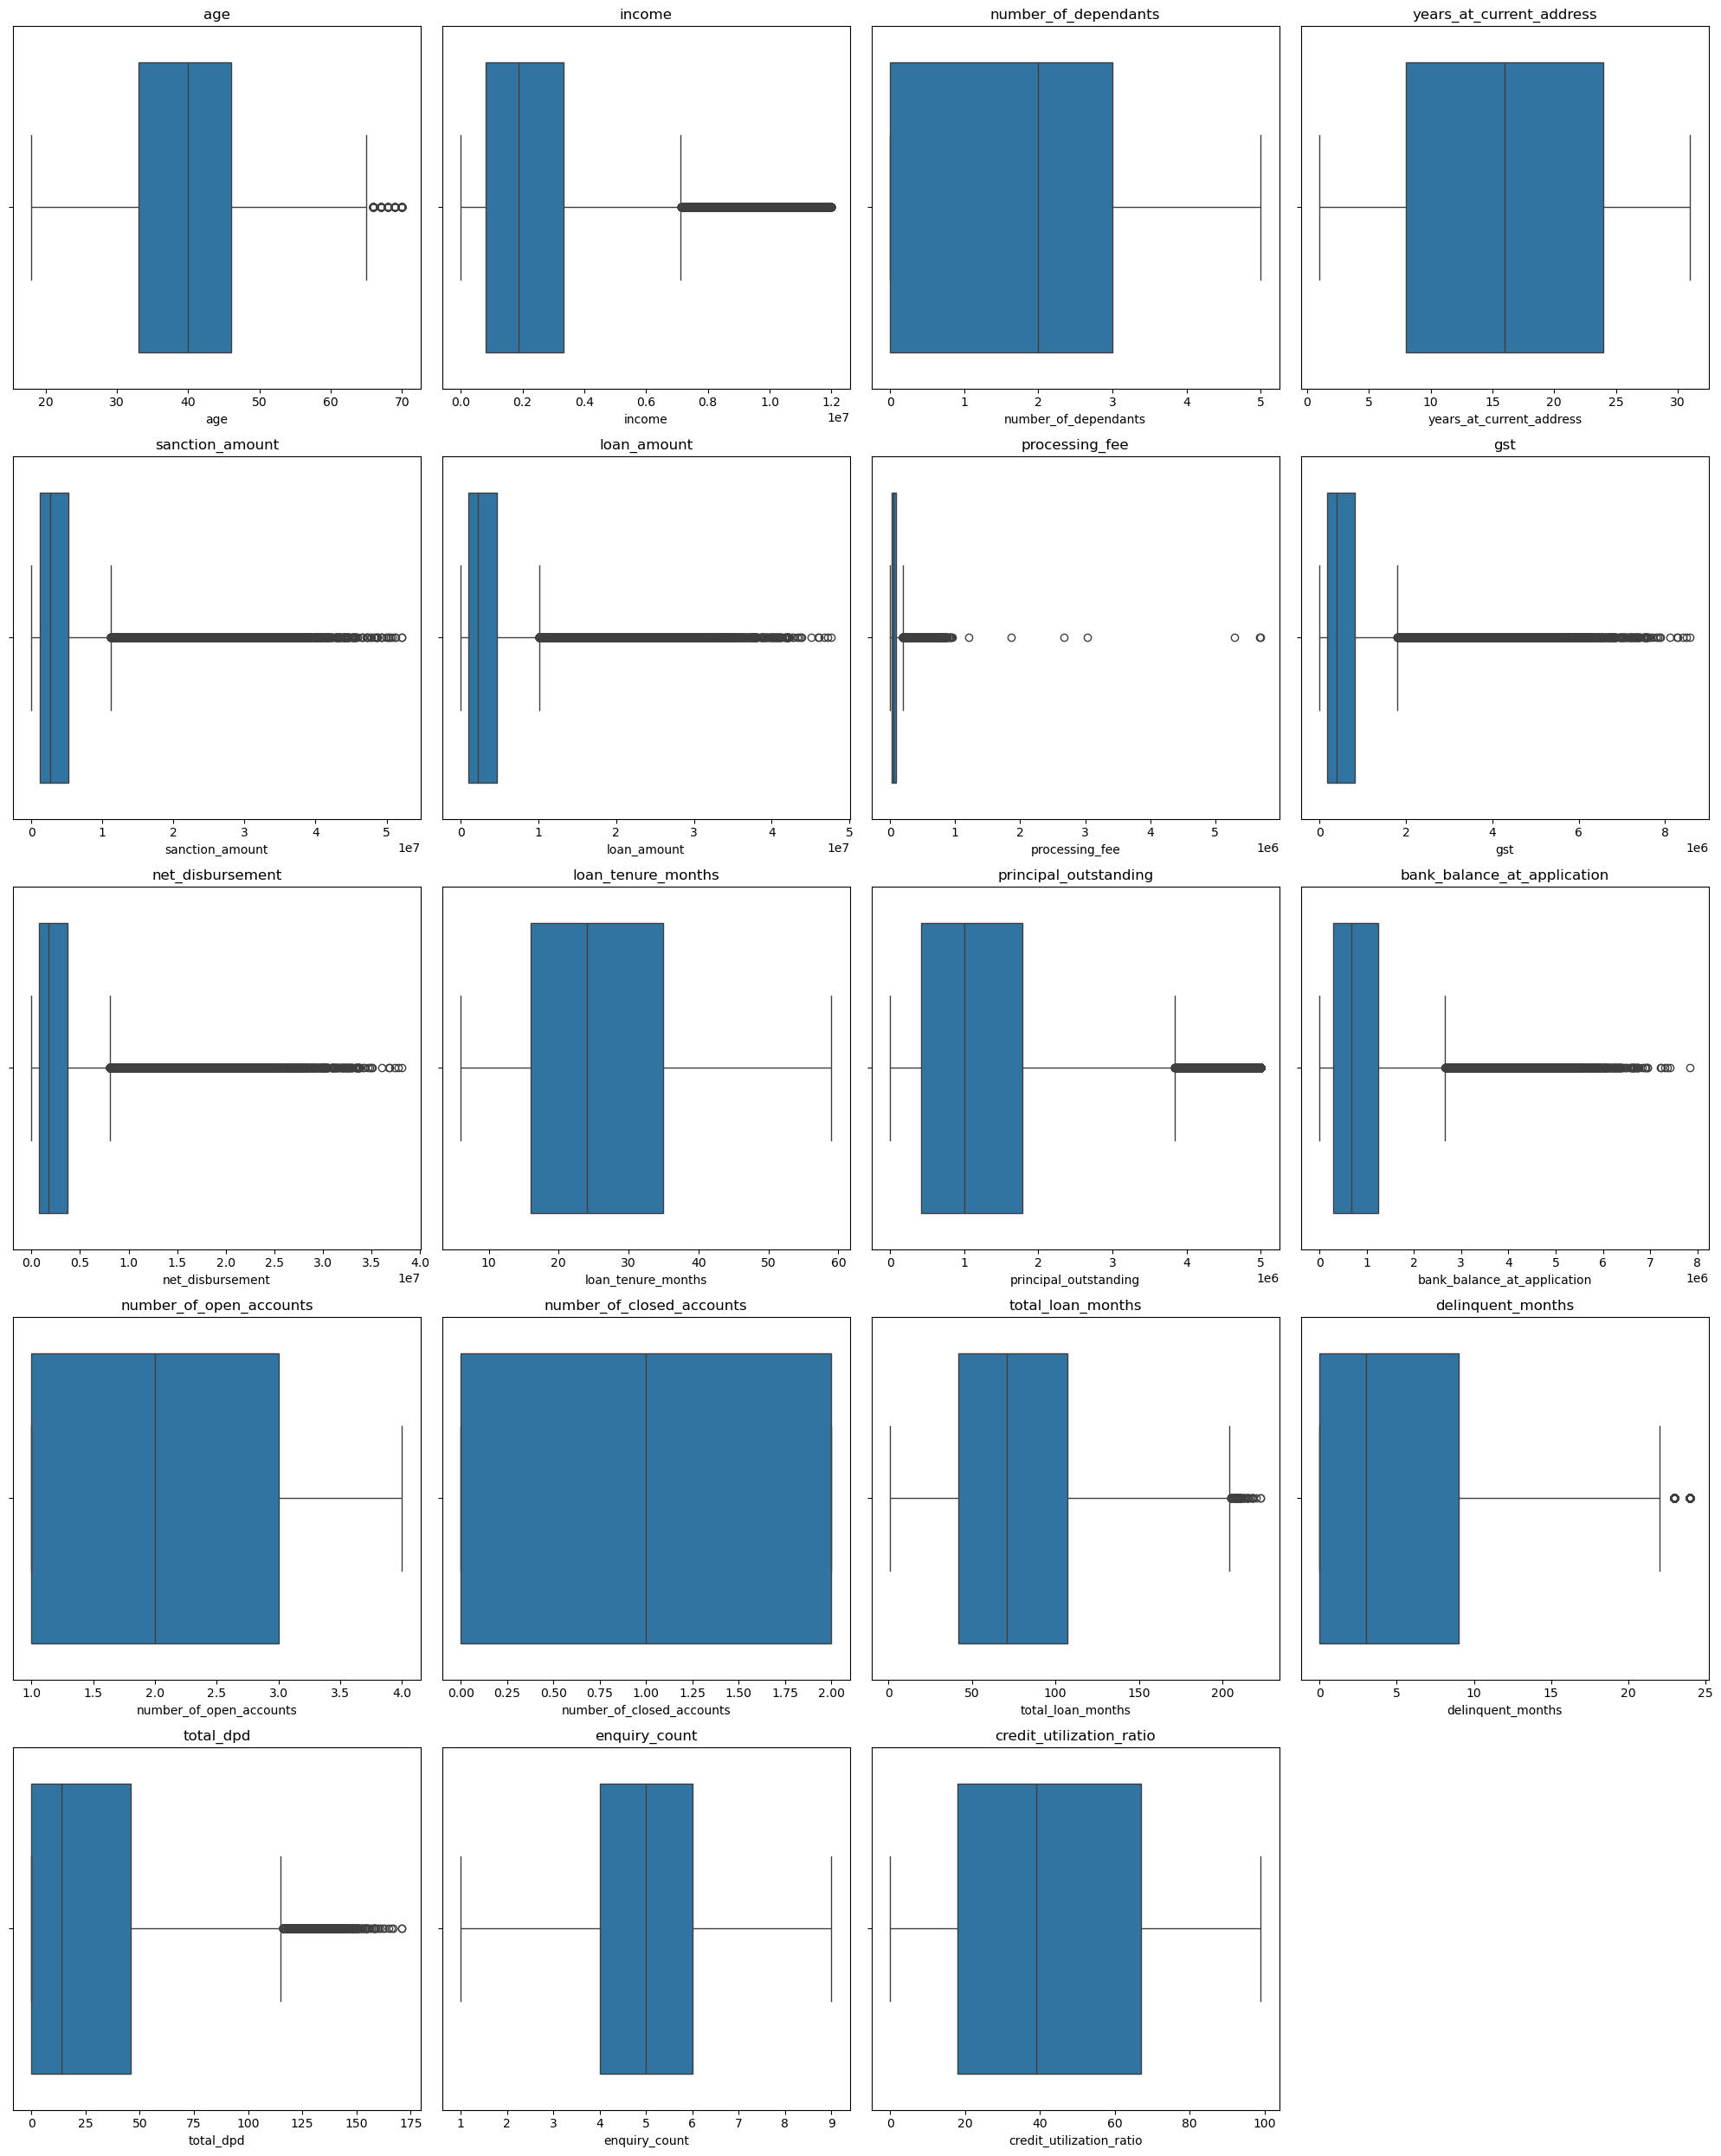

In [395]:
import seaborn as sns
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

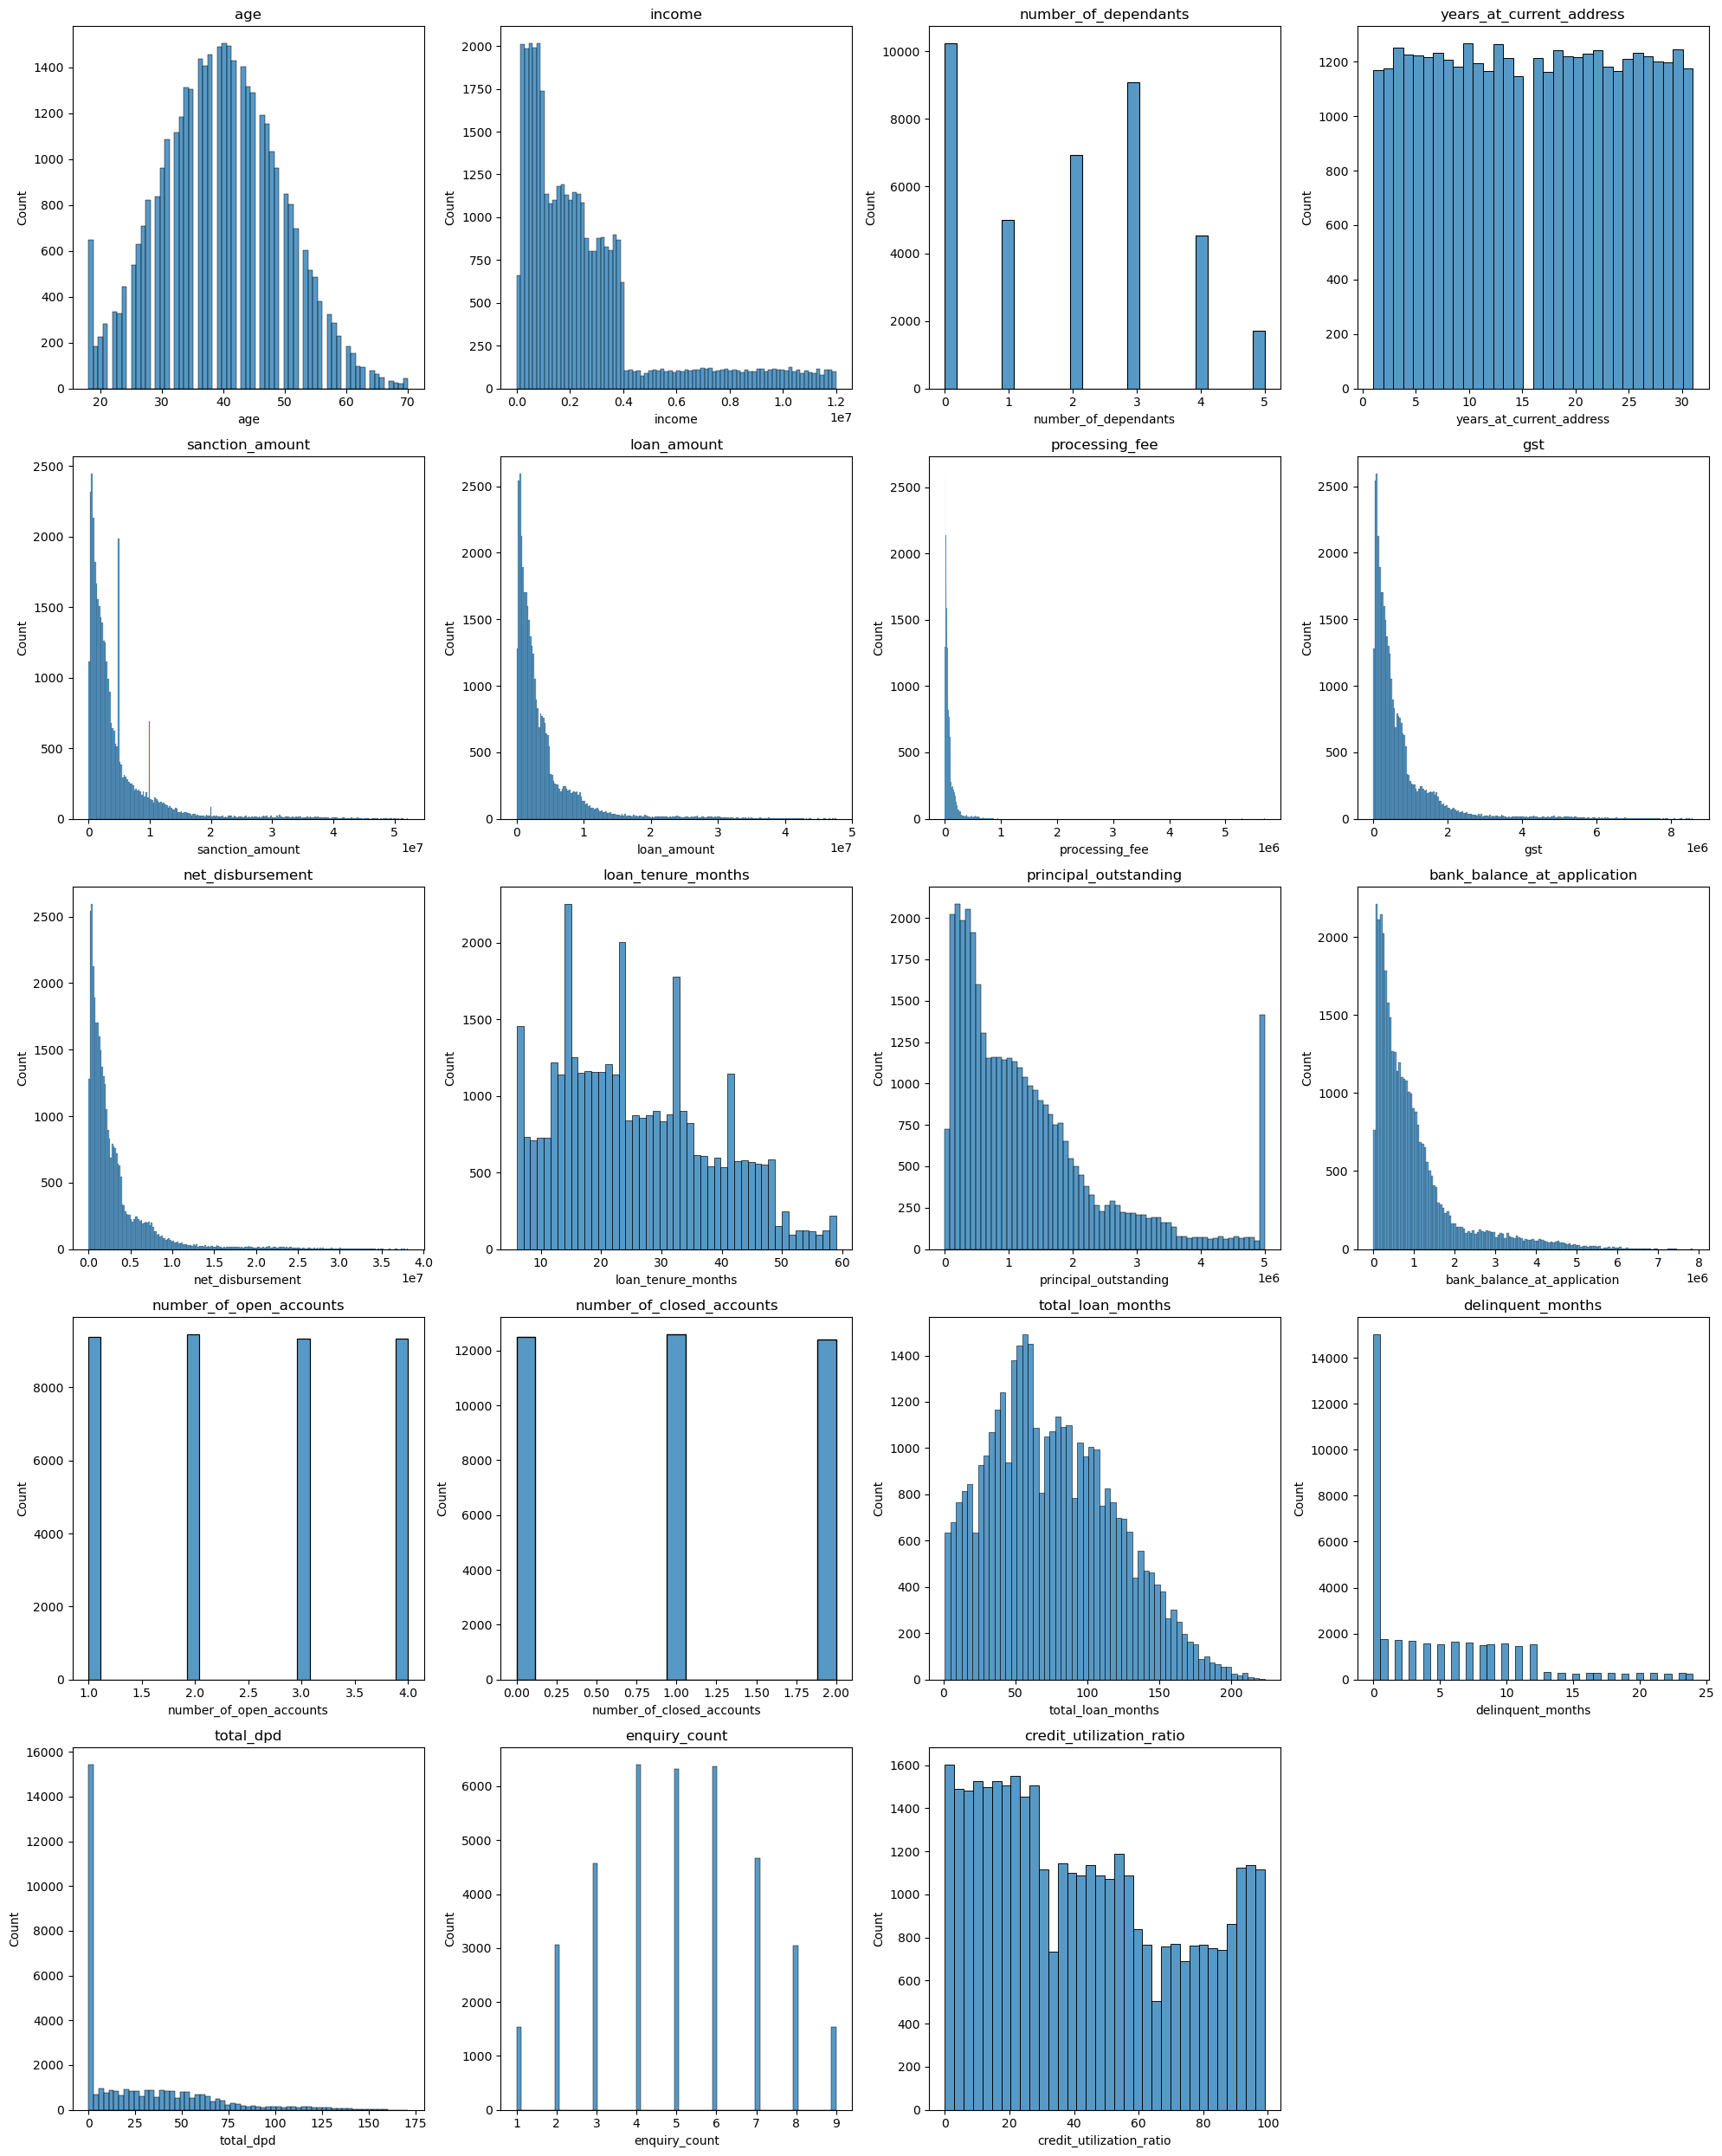

In [396]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Outlier Removal

In [397]:
df_train.processing_fee.describe()

count     37500.000
mean      80724.109
std      120830.650
min           0.000
25%       19180.000
50%       44700.000
75%       92000.000
max     5698029.901
Name: processing_fee, dtype: float64

In [398]:
df_train[df_train.processing_fee>df_train.loan_amount][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.023
9898,3626000,5293543.524
47089,1738000,1858964.768
33705,3812000,5678020.859
12294,4639000,5698029.901
28174,966000,1214492.673
29305,2616000,3036378.005


In [399]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.023
9898,3626000,5293543.524
47089,1738000,1858964.768
33705,3812000,5678020.859
12294,4639000,5698029.901
28174,966000,1214492.673
29305,2616000,3036378.005


In [400]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape

(37487, 33)

In [401]:
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12498, 33)

## Categorical Column Analysis

In [402]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [403]:
for col in columns_categorical:
    print(col, '-->', df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode --> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [404]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [405]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

In [406]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%

df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2].shape

(0, 33)

In [407]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 33)

## Exploratory Data Analysis

In [408]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

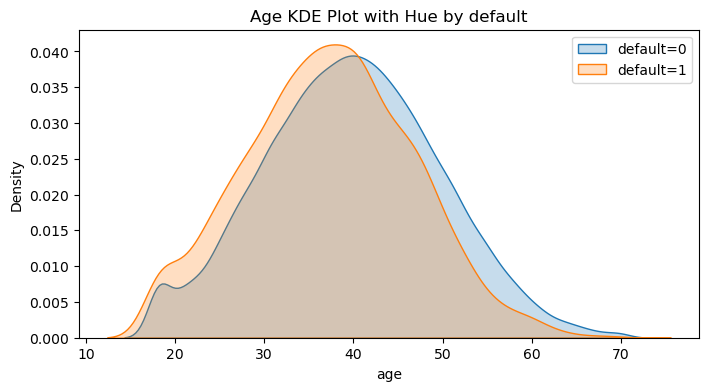

In [409]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

Orange (defaulted) group is slightly shifted to left indicating that younger ppl are more likely to default on their loans

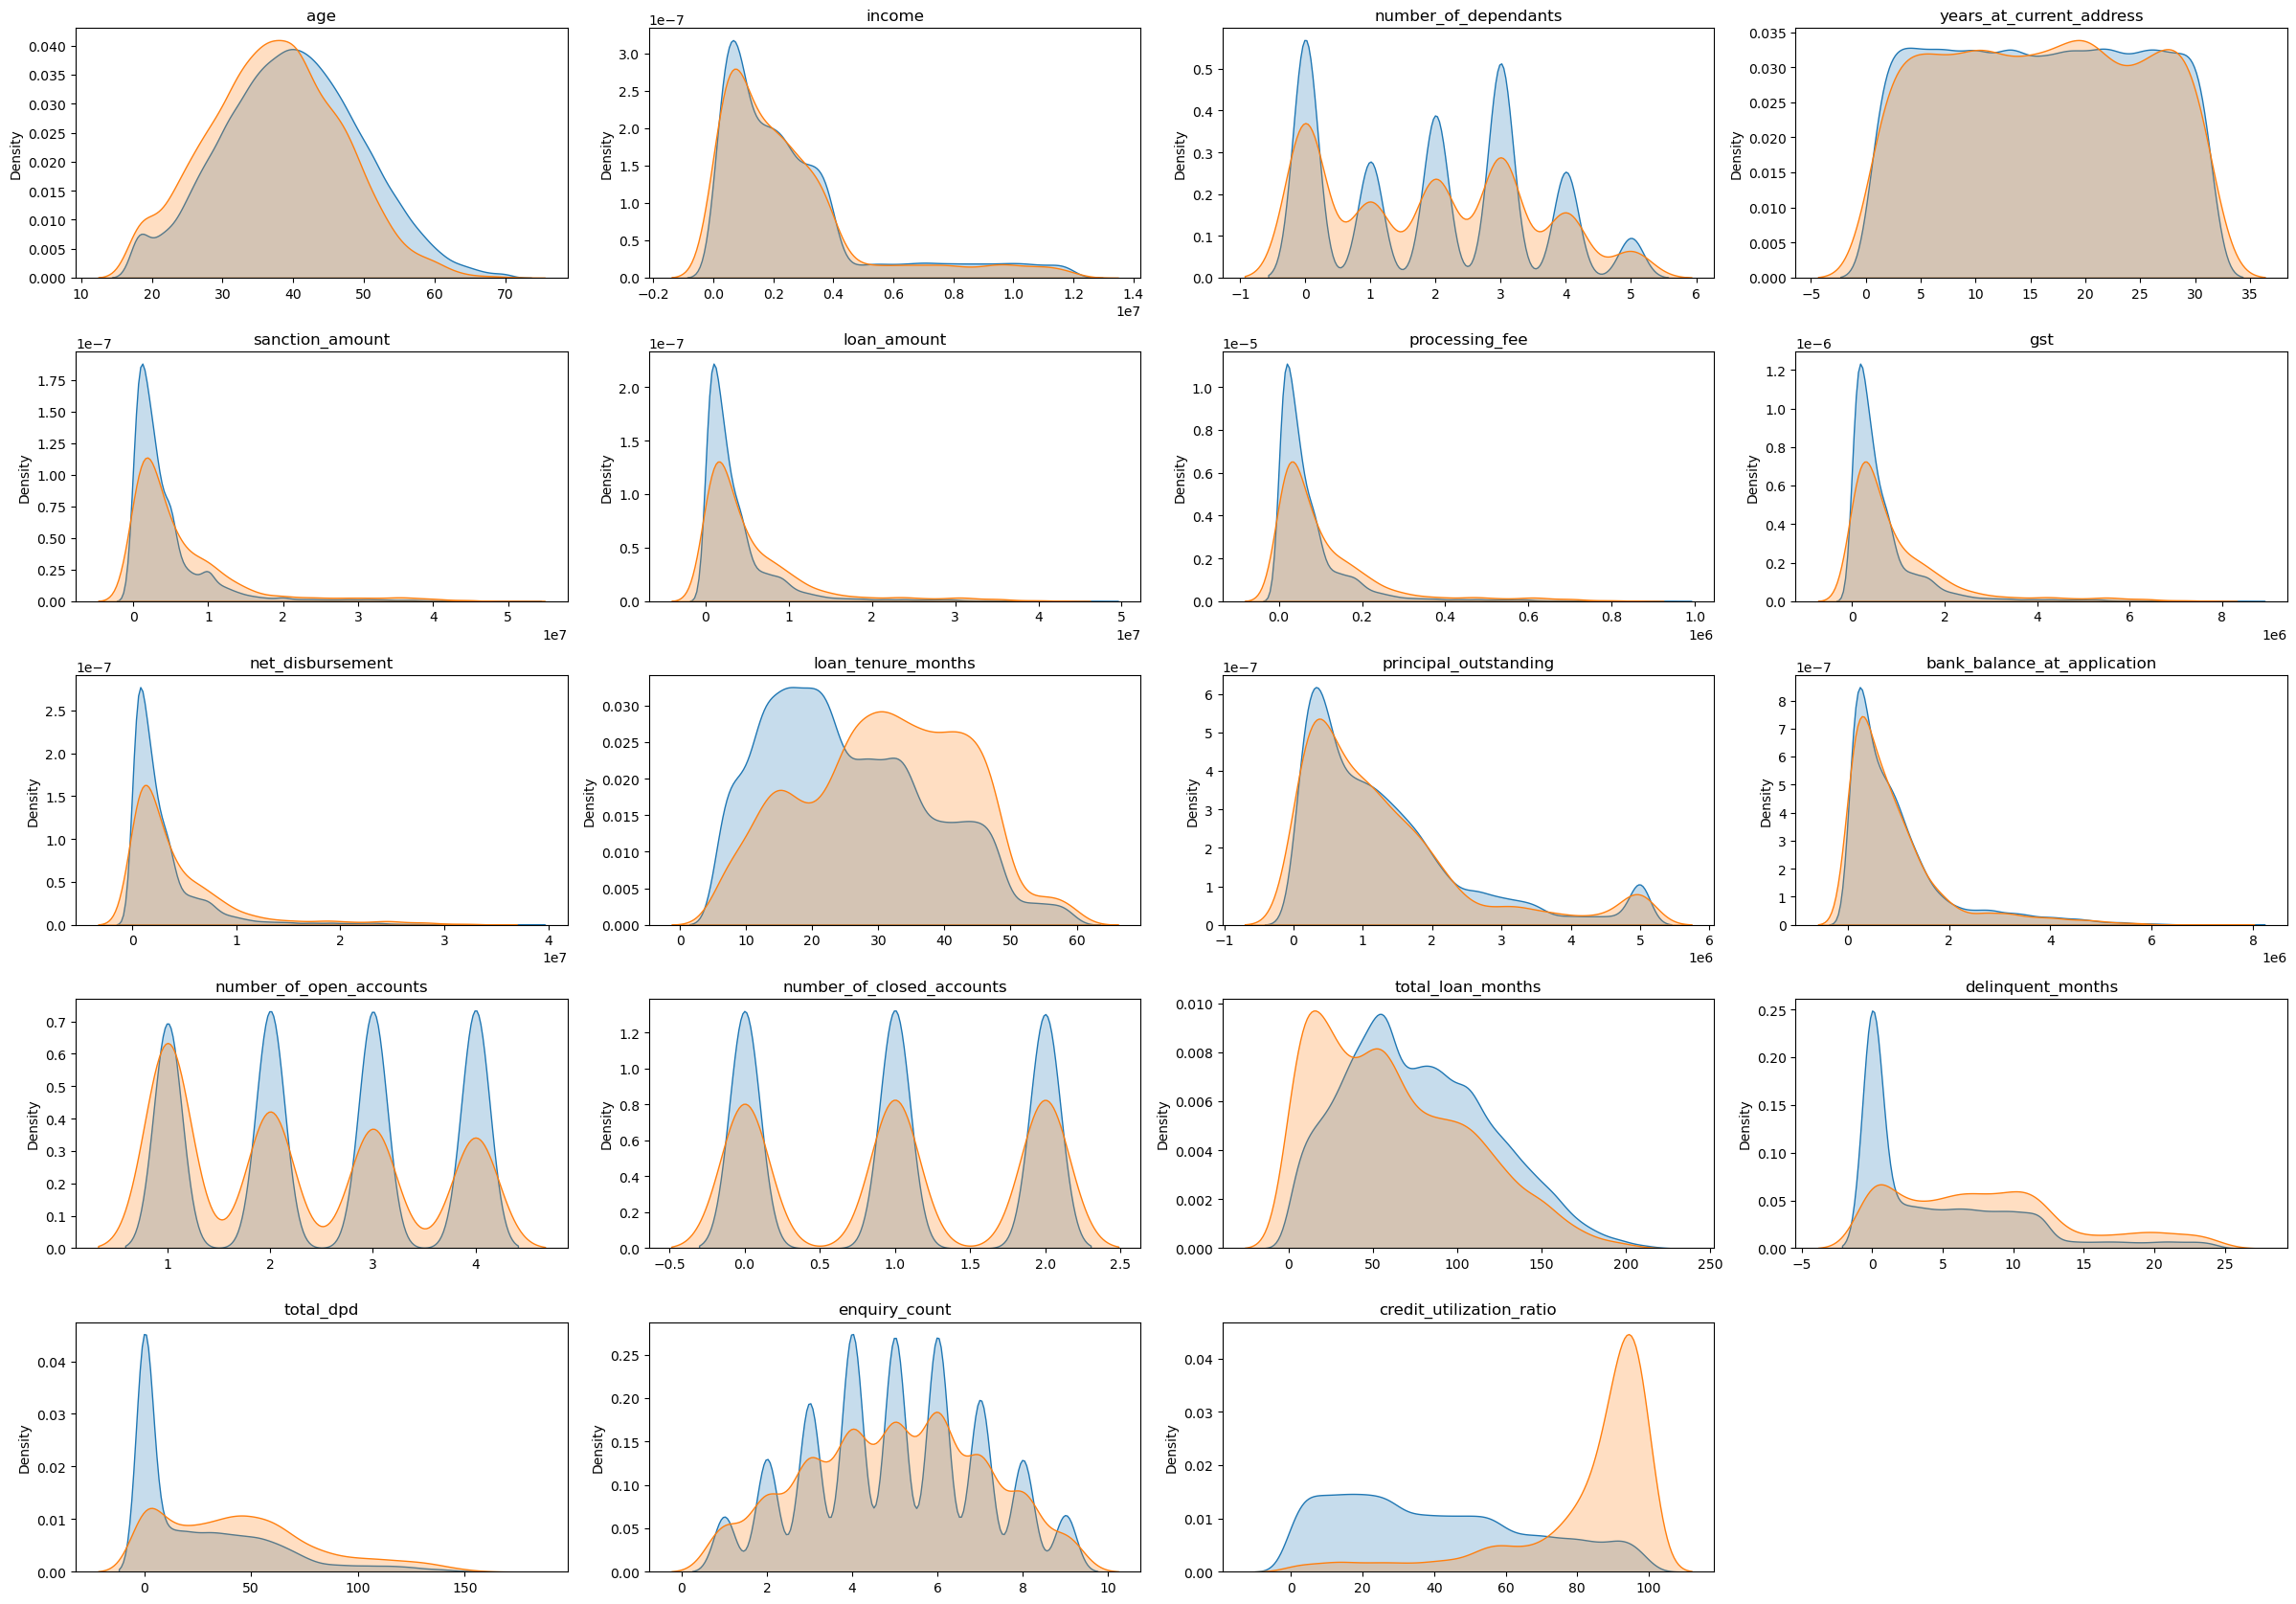

In [410]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
In remaining columns the distributions do not give any obvious insights
Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

## Feature Engineering

In [411]:
df_train_1[["loan_amount", "income"]].head(3)

,loan_amount,income
27434,3276000,1131000
13400,2540000,2343000
883,1920000,2891000


In [412]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount'] / df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count   37487.000
mean        1.555
std         0.973
min         0.300
25%         0.770
50%         1.160
75%         2.450
max         4.570
Name: loan_to_income, dtype: float64

In [413]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

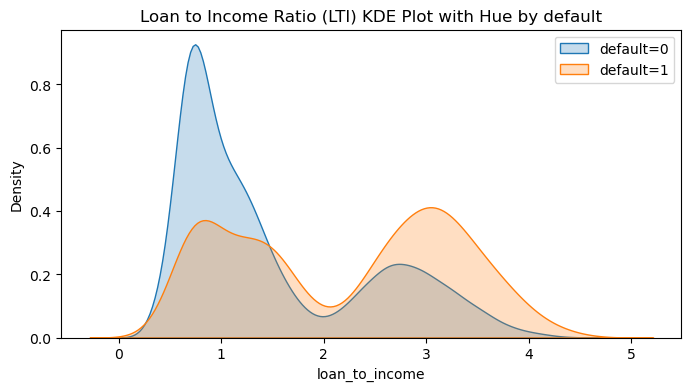

In [414]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

Blue graph has majority of its values on lower side of LTI
Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

In [415]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

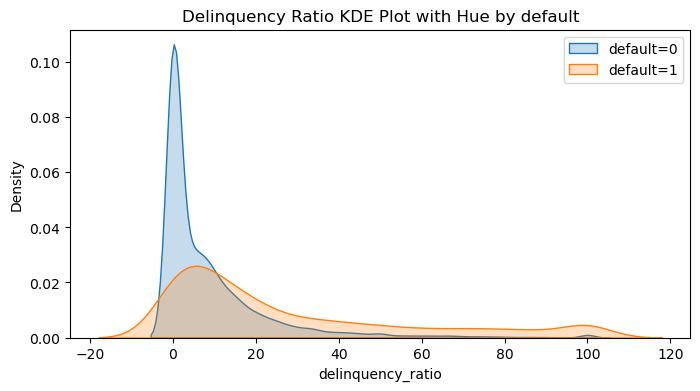

In [416]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

Blue graph has majority of its values on lower side of LTI
Orange graph has many values when delinquency ratio is higher indicating some correlation on default

In [417]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)
#where since there can be 0 delinquent months

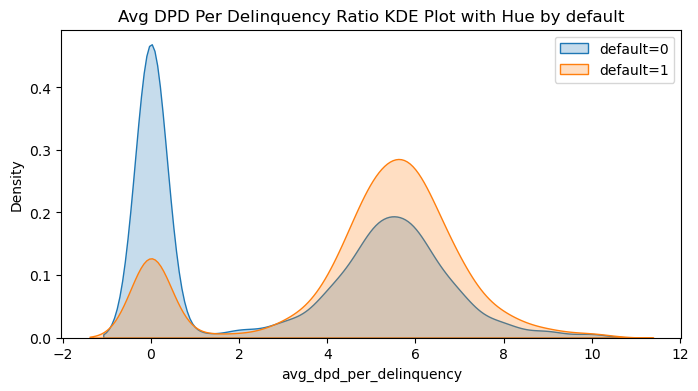

In [418]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

In [419]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

## Feature Selection

In [420]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

In [421]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [422]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [423]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000
mean,0.415,0.388,0.500,0.523,0.089,0.083,0.083,0.083,0.375,0.262,0.124,0.499,0.498,0.500,0.438,0.294,0.104,0.329
std,0.190,0.307,0.298,0.286,0.121,0.113,0.113,0.113,0.234,0.245,0.134,0.372,0.408,0.253,0.297,0.228,0.173,0.290
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.020,0.019,0.019,0.019,0.189,0.078,0.034,0.000,0.000,0.375,0.182,0.110,0.000,0.000
50%,0.423,0.400,0.500,0.492,0.050,0.046,0.046,0.046,0.340,0.194,0.083,0.333,0.500,0.500,0.394,0.201,0.038,0.430
75%,0.538,0.600,0.767,0.763,0.098,0.096,0.096,0.096,0.547,0.353,0.156,0.667,1.000,0.625,0.677,0.504,0.131,0.580
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [424]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000
mean,0.414,0.386,0.503,0.526,0.089,0.083,0.083,0.083,0.379,0.263,0.125,0.504,0.507,0.503,0.439,0.294,0.104,0.331
std,0.189,0.307,0.296,0.287,0.119,0.111,0.111,0.111,0.235,0.245,0.134,0.374,0.406,0.256,0.297,0.227,0.174,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.020,0.020,0.020,0.189,0.079,0.035,0.000,0.000,0.375,0.182,0.110,0.000,0.000
50%,0.423,0.400,0.500,0.510,0.050,0.046,0.046,0.046,0.358,0.195,0.084,0.667,0.500,0.500,0.394,0.204,0.038,0.430
75%,0.538,0.600,0.767,0.763,0.099,0.097,0.097,0.097,0.547,0.355,0.157,1.000,1.000,0.750,0.677,0.504,0.129,0.578
max,1.000,1.000,1.000,1.000,0.951,1.003,1.003,1.003,1.000,1.000,0.879,1.000,1.000,1.000,1.000,1.005,1.000,1.000


In [425]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [426]:
X_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.519,F,Single,Salaried,0.000,Owned,0.133,Ahmedabad,Gujarat,0.458,...,0.340,0.175,0.070,1.000,1.000,0.875,0.596,0.609,0.067,0.550
13400,0.212,M,Single,Salaried,0.000,Owned,0.800,Delhi,Delhi,0.000,...,0.509,0.196,0.119,0.667,0.500,0.375,0.929,0.183,0.034,0.420


In [427]:
calculate_vif(X_train[cols_to_scale])

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.717
1,number_of_dependants,2.732
2,years_at_current_address,3.424
3,zipcode,3.793
4,sanction_amount,102.155
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.141
9,principal_outstanding,16.280


In [428]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [429]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.446
1,number_of_dependants,2.728
2,years_at_current_address,3.408
3,zipcode,3.771
4,loan_tenure_months,5.983
5,bank_balance_at_application,1.801
6,number_of_open_accounts,4.321
7,number_of_closed_accounts,2.351
8,enquiry_count,6.367
9,credit_utilization_ratio,2.916


In [430]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

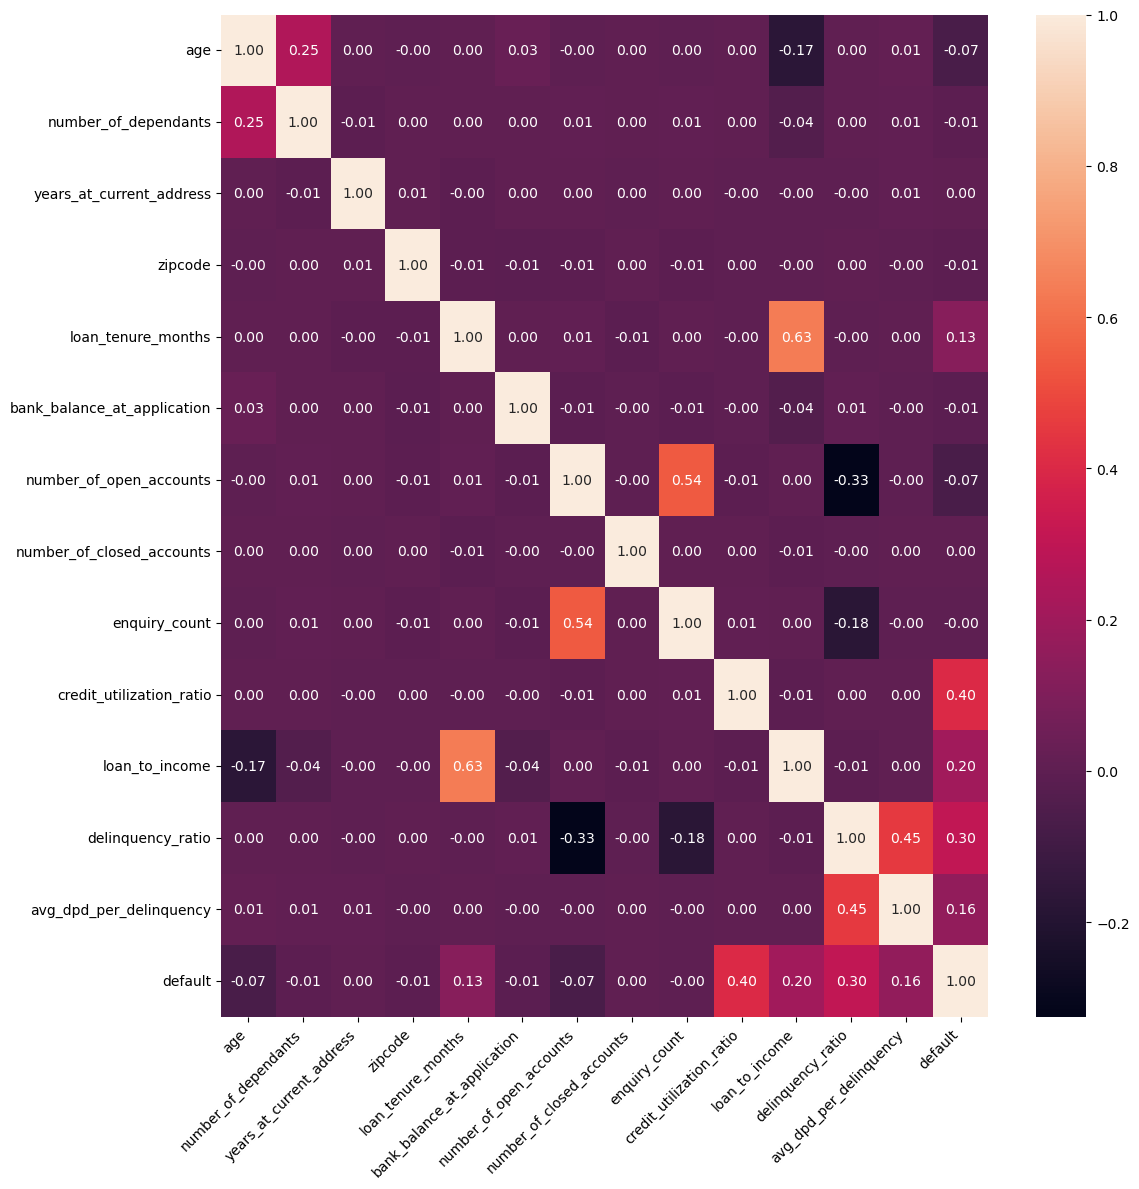

In [431]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [432]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.098,0.208,-0.746,0.082
Education,5626,546,5080,0.171,0.148,0.145,0.003
Home,11271,1744,9527,0.547,0.278,0.677,0.182
Personal,13153,585,12568,0.183,0.366,-0.692,0.127


In [433]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  float64
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  float64
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  float64
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  float64
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  loan_tenure_months           37487 non-null  float64
 13  bank_balance_at_a

In [434]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': 0.07592687127752061,
 'gender': 0.000482276463421216,
 'marital_status': 0.002196681370832318,
 'employment_status': 0.002447818101774487,
 'number_of_dependants': 0.00364589452118596,
 'residence_type': 0.2594019617563985,
 'years_at_current_address': 0.001042536380353028,
 'city': 0.000817870465334103,
 'state': 0.0007881984519711978,
 'zipcode': 0.0007436024782513755,
 'loan_purpose': 0.39377543144164784,
 'loan_type': 0.17304705897793143,
 'loan_tenure_months': 0.23450610202970526,
 'bank_balance_at_application': 0.004242001247914226,
 'number_of_open_accounts': 0.07324250836253295,
 'number_of_closed_accounts': 0.00026280824021760536,
 'enquiry_count': 0.005484982638303533,
 'credit_utilization_ratio': 2.4228228499400095,
 'loan_to_income': 0.4915664145044282,
 'delinquency_ratio': 0.678322540101926,
 'avg_dpd_per_delinquency': 0.4210029044696208}

In [435]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.423
19,delinquency_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_delinquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [436]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [437]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [438]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.183,0.034,0.420,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.084,0.169,0.560,False,False,False,False,True,True


In [439]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.623,1.000,0.859,0.689,0.000,0.000,True,False,False,True,False,False
199,0.192,0.623,1.000,0.727,0.635,0.000,0.000,True,False,False,True,False,False


## Model Training

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



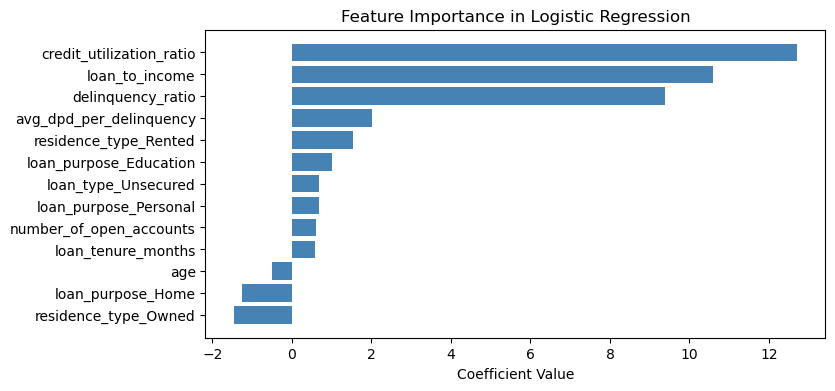

In [441]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [444]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.70      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [445]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.74      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

In [446]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': 545.5594781168514}
Best Score: 0.7629160071967581
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [447]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7922212478001461
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498

[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=newton-cg; total time=   0.1s
[CV] END ............C=0.23357214690901212, solver=newton-cg; total time=   0.0s
[CV] END ....................C=206.913808111479, sol

Attempt 2
Logistic Regression & XGB
Handle Class Imbalance Using Under Sampling

In [448]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [449]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [450]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11390
           1       0.52      0.98      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.95      0.81     12498
weighted avg       0.96      0.92      0.93     12498



Attempt 3
Logistic Regression
Handle Class Imbalance Using SMOTE Tomek
Parameter tunning using optuna

In [451]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34223
1    34223
Name: count, dtype: int64

In [452]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [453]:
pip install optuna

  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.14.1-py3-none-any.whl (43 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
Note: you may need to restart the kernel to use updated packages.


In [454]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [455]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-07-28 18:34:27,290] A new study created in memory with name: no-name-86879d9d-c219-4b9c-86ff-4034e079305e
[I 2025-07-28 18:34:28,283] Trial 0 finished with value: 0.9448475086820326 and parameters: {'C': 1991.006654670776, 'solver': 'liblinear', 'tol': 0.007716945117829937, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9448475086820326.
[I 2025-07-28 18:34:28,702] Trial 1 finished with value: 0.9274689624750337 and parameters: {'C': 7.689599941597828, 'solver': 'newton-cg', 'tol': 0.007639893114035103, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9448475086820326.
[I 2025-07-28 18:34:29,137] Trial 2 finished with value: 0.9395222256614906 and parameters: {'C': 303.93648034171497, 'solver': 'lbfgs', 'tol': 0.0023419676200600007, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9448475086820326.
[I 2025-07-28 18:34:29,551] Trial 3 finished with value: 0.9430453451867814 and parameters: {'C': 0.2629733856552753, 'solver': 'saga', 'tol': 0.06809

In [456]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.945019132629263
  Params: 
    C: 152.46268140901947
    solver: liblinear
    tol: 0.02226202628974672
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



Attempt 4
XGBoost
Handle Class Imbalance Using SMOTE Tomek
Parameter tunning using optuna

In [457]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-07-28 18:54:13,652] A new study created in memory with name: no-name-a97c663c-e560-476f-bf9b-d2f0810e65a2
[I 2025-07-28 18:54:16,679] Trial 0 finished with value: 0.9682600049304991 and parameters: {'lambda': 0.21244798164618428, 'alpha': 0.15524093207398398, 'subsample': 0.8751335741672238, 'colsample_bytree': 0.550343330593605, 'max_depth': 5, 'eta': 0.21707045107755377, 'gamma': 1.5517970774269507, 'scale_pos_weight': 2.3584104765987126, 'min_child_weight': 8, 'max_delta_step': 1}. Best is trial 0 with value: 0.9682600049304991.
[I 2025-07-28 18:54:19,217] Trial 1 finished with value: 0.970503017224459 and parameters: {'lambda': 1.871805925172125, 'alpha': 1.4071536808502079, 'subsample': 0.7175022159281575, 'colsample_bytree': 0.7387087258359065, 'max_depth': 6, 'eta': 0.15303731851004926, 'gamma': 1.5817605843894045, 'scale_pos_weight': 1.6897403791656602, 'min_child_weight': 2, 'max_delta_step': 0}. Best is trial 1 with value: 0.970503017224459.
[I 2025-07-28 18:54:22,131

In [458]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9751575948315034
  Params: 
    lambda: 0.021153533353105554
    alpha: 0.11213010646630943
    subsample: 0.6423033628213956
    colsample_bytree: 0.8899558847850583
    max_depth: 8
    eta: 0.2499194792873921
    gamma: 1.1939518716256572
    scale_pos_weight: 1.4332836824206243
    min_child_weight: 9
    max_delta_step: 3
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11390
           1       0.73      0.85      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.86      0.91      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [459]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [460]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.77963126e-05,
        8.77963126e-05]),
 array([0.        , 0.00090253, 0.20577617, 0.20577617, 0.23285199]),
 array([       inf, 0.99999977, 0.99808258, 0.99805924, 0.99739193]))

In [461]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9829906530207321

In [462]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.752
199,0,0.164


In [463]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.752,8
199,0,0.164,7


In [464]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.507
std        0.173
min        0.237
25%        0.354
50%        0.497
75%        0.665
max        0.811
Name: Default Probability, dtype: float64

In [465]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

/var/folders/p8/mlwqld3d7l55q9vgw0x3pylm0000gn/T/ipykernel_73481/4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.002,0.000,1250.000
5,5,0.002,0.008,1.000,1249.000
6,6,0.008,0.044,3.000,1246.000
7,7,0.044,0.237,17.000,1233.000
8,8,0.237,0.811,170.000,1080.000
9,9,0.811,1.000,917.000,333.000


In [466]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
4,4,0.000,0.002,0.000,1250.000,0.000,100.000
5,5,0.002,0.008,1.000,1249.000,0.080,99.920
6,6,0.008,0.044,3.000,1246.000,0.240,99.760
7,7,0.044,0.237,17.000,1233.000,1.360,98.640
8,8,0.237,0.811,170.000,1080.000,13.600,86.400
9,9,0.811,1.000,917.000,333.000,73.360,26.640


In [467]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.811,1.000,917.000,333.000,73.360,26.640
1,8,0.237,0.811,170.000,1080.000,13.600,86.400
2,7,0.044,0.237,17.000,1233.000,1.360,98.640
3,6,0.008,0.044,3.000,1246.000,0.240,99.760
4,5,0.002,0.008,1.000,1249.000,0.080,99.920
5,4,0.000,0.002,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [468]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.811,1.000,917.000,333.000,73.360,26.640,917.000,333.000
1,8,0.237,0.811,170.000,1080.000,13.600,86.400,1087.000,1413.000
2,7,0.044,0.237,17.000,1233.000,1.360,98.640,1104.000,2646.000
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [469]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.811,1.000,917.000,333.000,73.360,26.640,917.000,333.000,82.762,2.924
1,8,0.237,0.811,170.000,1080.000,13.600,86.400,1087.000,1413.000,98.105,12.406
2,7,0.044,0.237,17.000,1233.000,1.360,98.640,1104.000,2646.000,99.639,23.231
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000,99.910,34.170
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [470]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.811,1.000,917.000,333.000,73.360,26.640,917.000,333.000,82.762,2.924,79.838
1,8,0.237,0.811,170.000,1080.000,13.600,86.400,1087.000,1413.000,98.105,12.406,85.699
2,7,0.044,0.237,17.000,1233.000,1.360,98.640,1104.000,2646.000,99.639,23.231,76.408
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000,99.910,34.170,65.739
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


In [471]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9829906530207321
Gini Coefficient: 0.9659813060414641


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

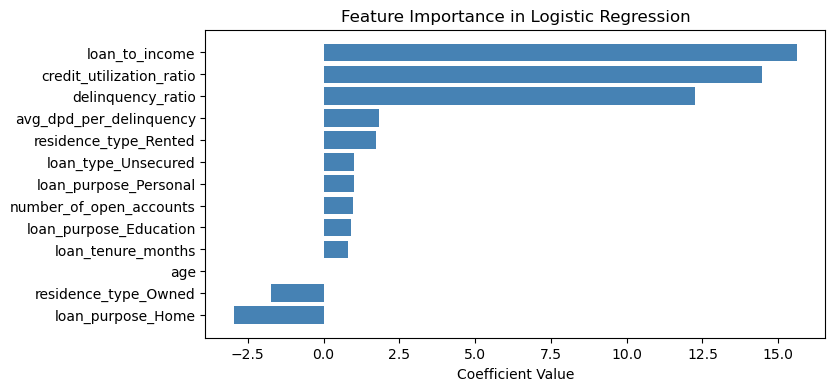

In [472]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [478]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']